## Project #3 - Non-linear regression

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

...

## Introduction

...

## Tasks

### Non-linear regression

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Read data
df = pd.read_excel('LogDataProject_Cleaned_OutliersRemoved.xlsx')

# Define input (x) and target (y)
x = df['Vs']
y = df['Vp']

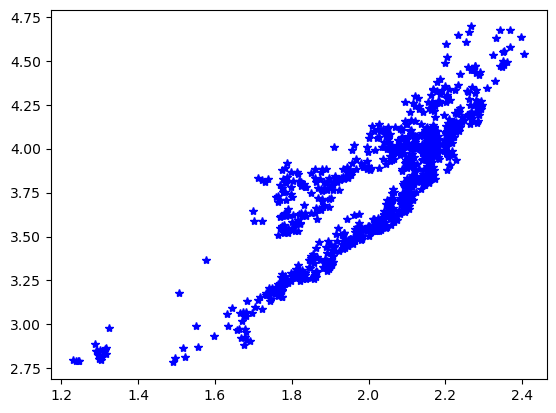

In [2]:
# Plot the data
plt.plot(x, y, 'b*')

#### Modeling and model performance analysis

a: 1.9167270023765266, b: -0.35170324722165086


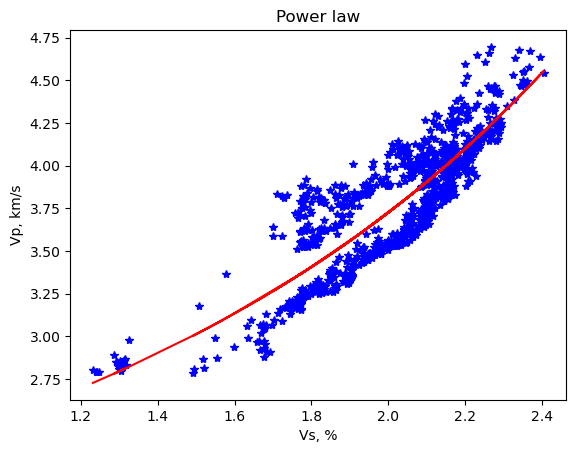

In [7]:
# Define the function form
def func(x, a, b):
    return a**np.exp(-b*x)

# Optimize the parameters values a and b
popt, _ = curve_fit(func, x, y)

# Print the optimized paramaters
a, b = popt
print(f"a: {a}, b: {b}")

# Plot the dataset
plt.plot(x, y, 'b*')

# Create a line plot for the mapping function
y_model_predict = func(x, a, b)
plt.plot(x, y_model_predict, 'r-')
plt.xlabel('Vs, %')
plt.ylabel('Vp, km/s')
plt.title('Power law')
plt.show()

# Calculate the R2 score
r2 = r2_score(y, y_model_predict)
print(f'R2 score: {r2}')

In [ ]:
# a) Perform non-linear regression modeling

# b) Select the best model and compute uniaxial compressive strength (Co) with the true Vp and model estimated Vp. Plus plot the results

**Comments:**

## Discussion and conclusion

...

## Reflections

...

## References

...